# Mobile Data Analysis

#### The target variable indicates as below:

* 0 (low cost)
* 1 (medium cost)
* 2 (high cost)
* 3 (very high cost)

In [1]:
## importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## loading data
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

#### Working on train set

In [3]:
## renaming some column
train_set.rename(columns = {'blue':'bluetooth' , 'fc':'front_camera(mp)' , 'four_g':'4G' , 'm_dep':'mobile_depth' ,'pc':'main_camera(mp)' , 'sc_h':'screen_height' , 'sc_w':'screen_width' , 'three_g':'3G'},inplace=True)
test_set.rename(columns = {'blue':'bluetooth' , 'fc':'front_camera(mp)' , 'four_g':'4G' , 'm_dep':'mobile_depth' ,'pc':'main_camera(mp)' , 'sc_h':'screen_height' , 'sc_w':'screen_width' , 'three_g':'3G'},inplace=True)
id = test_set['id']

In [4]:
## viewing data
train_set.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera(mp),4G,int_memory,mobile_depth,mobile_wt,n_cores,...,px_height,px_width,ram,screen_height,screen_width,talk_time,3G,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   battery_power     2000 non-null   int64  
 1   bluetooth         2000 non-null   int64  
 2   clock_speed       2000 non-null   float64
 3   dual_sim          2000 non-null   int64  
 4   front_camera(mp)  2000 non-null   int64  
 5   4G                2000 non-null   int64  
 6   int_memory        2000 non-null   int64  
 7   mobile_depth      2000 non-null   float64
 8   mobile_wt         2000 non-null   int64  
 9   n_cores           2000 non-null   int64  
 10  main_camera(mp)   2000 non-null   int64  
 11  px_height         2000 non-null   int64  
 12  px_width          2000 non-null   int64  
 13  ram               2000 non-null   int64  
 14  screen_height     2000 non-null   int64  
 15  screen_width      2000 non-null   int64  
 16  talk_time         2000 non-null   int64  


In [6]:
train_set.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim',
       'front_camera(mp)', '4G', 'int_memory', 'mobile_depth', 'mobile_wt',
       'n_cores', 'main_camera(mp)', 'px_height', 'px_width', 'ram',
       'screen_height', 'screen_width', 'talk_time', '3G', 'touch_screen',
       'wifi', 'price_range'],
      dtype='object')

In [7]:
train_set.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera(mp),4G,int_memory,mobile_depth,mobile_wt,n_cores,...,px_height,px_width,ram,screen_height,screen_width,talk_time,3G,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Corealtion

In [8]:
a=train_set.corr()
a['price_range'].sort_values(ascending=False)

price_range         1.000000
ram                 0.917046
battery_power       0.200723
px_width            0.165818
px_height           0.148858
int_memory          0.044435
screen_width        0.038711
main_camera(mp)     0.033599
3G                  0.023611
screen_height       0.022986
front_camera(mp)    0.021998
talk_time           0.021859
bluetooth           0.020573
wifi                0.018785
dual_sim            0.017444
4G                  0.014772
n_cores             0.004399
mobile_depth        0.000853
clock_speed        -0.006606
mobile_wt          -0.030302
touch_screen       -0.030411
Name: price_range, dtype: float64

<AxesSubplot:>

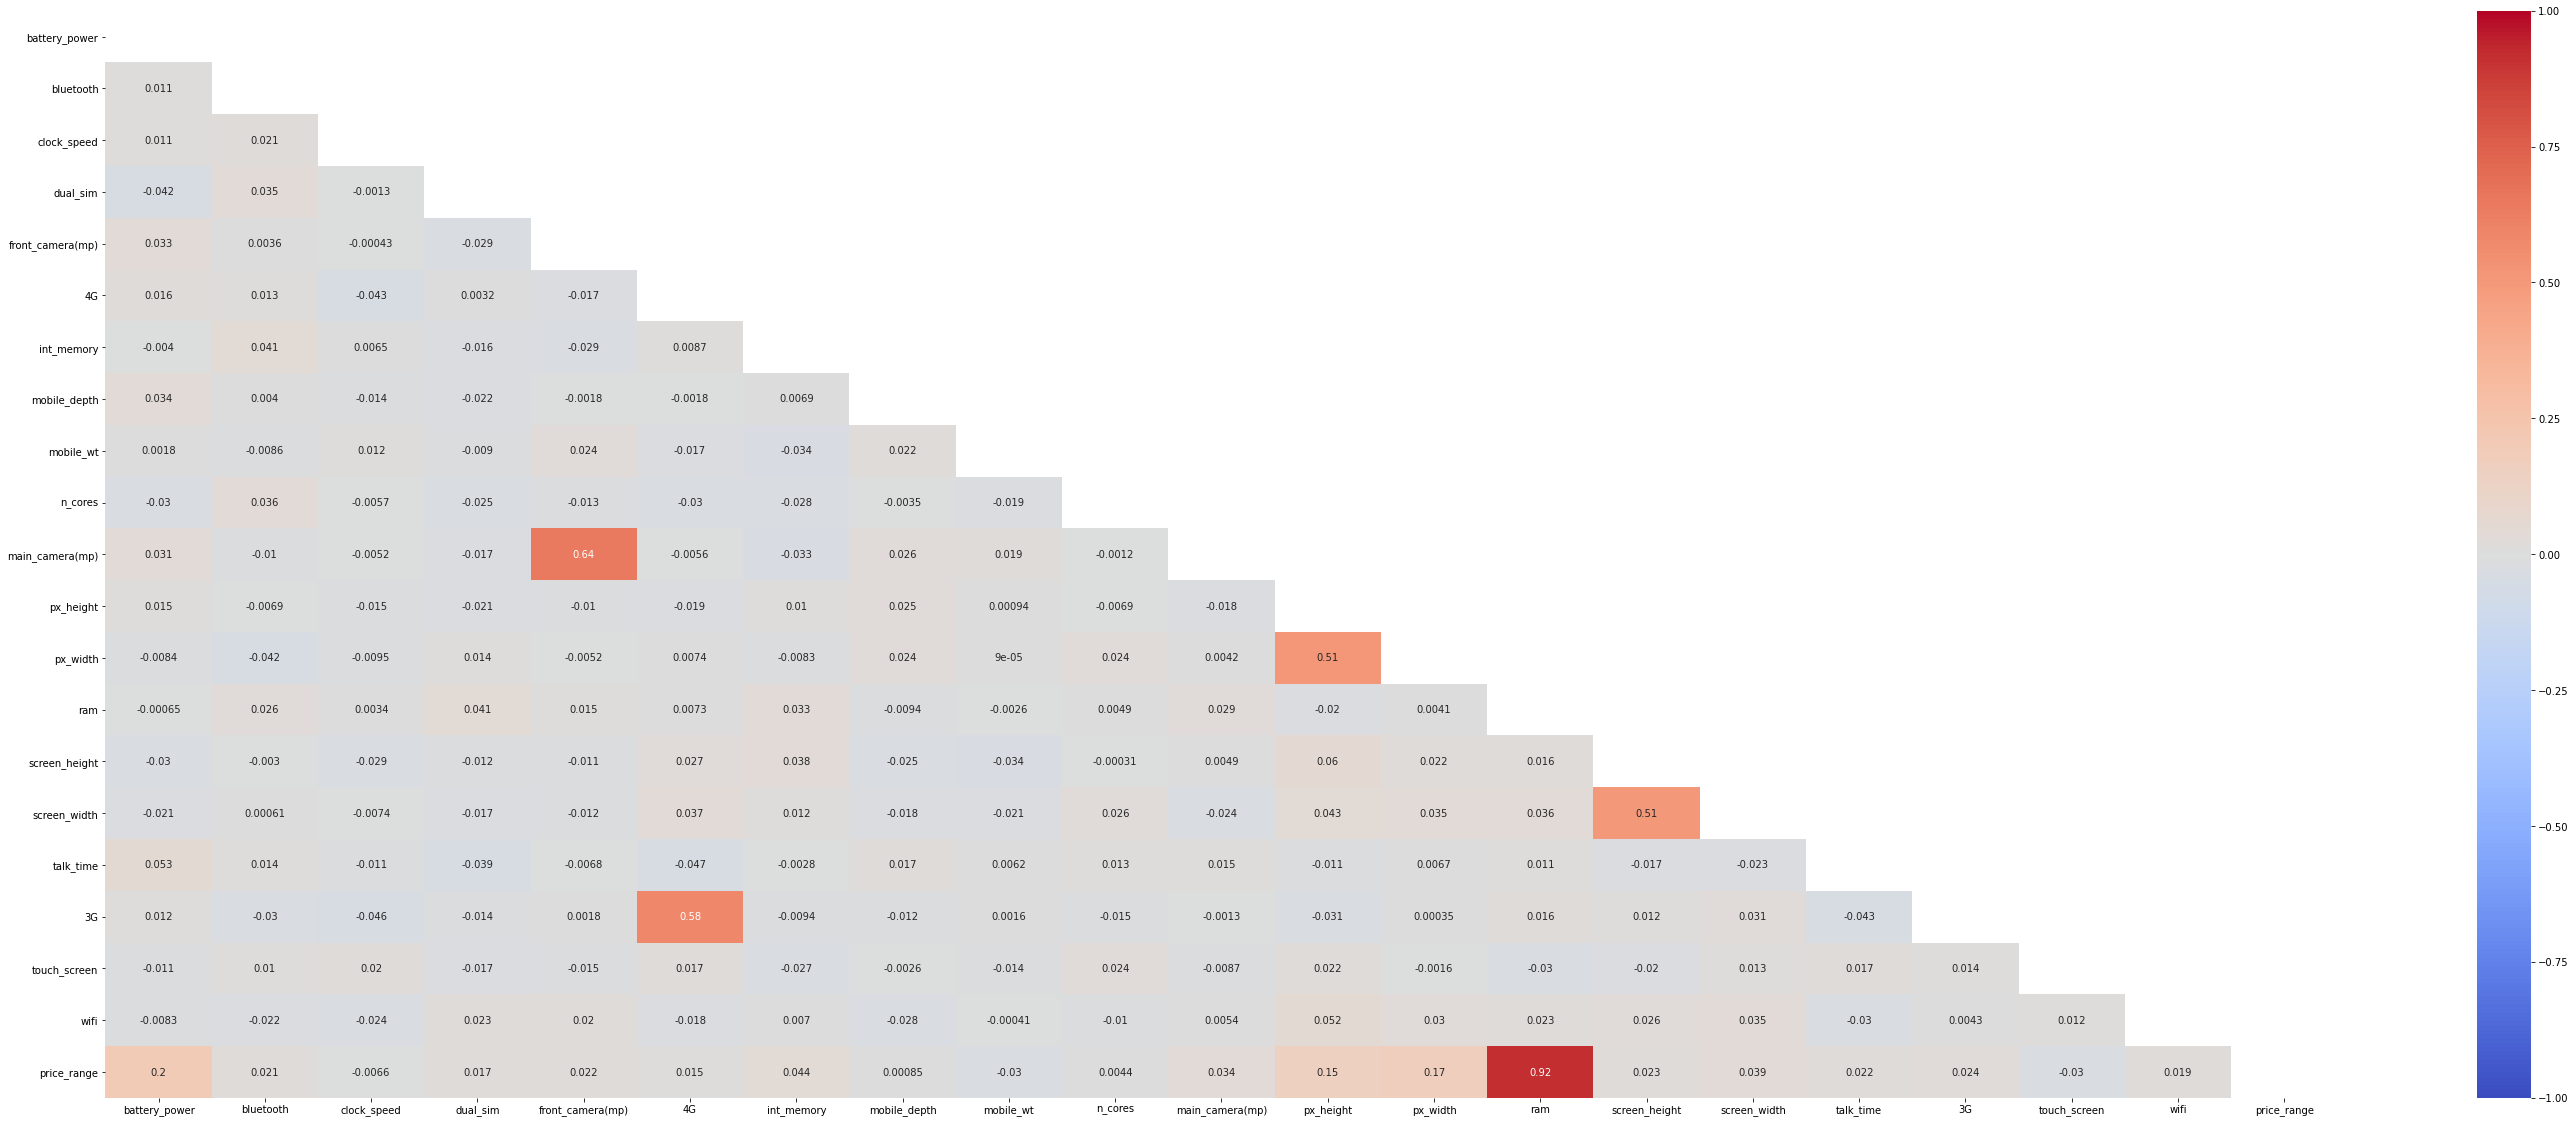

In [9]:
## ploting a heat map
plt.figure(figsize=(50,20))
mask = np.zeros(a.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap( a ,vmin=-1,vmax=1 ,center=0,cmap='coolwarm',annot=True , mask=mask )

* Feature corealted with price_range is Ram(0.9) , battery_power(0.2) , px_width (0.16) ,px_height(0.14) , int_memory(0.04)

* Feature are nor corealted with price_range is clock_speed(-0.006) , mobile_wt (-0.03) , touch_screen(0.03)

#### We use Mutual Information also to detect any  kinds of realation because correaltion detect only linear relationship

## Mutual Information

* We have categorical label (price_range) so we use mutual_info_classif

In [10]:
X = train_set.copy()
Y = X.pop('price_range')
discrete_features = X.dtypes == int

In [11]:
from sklearn.feature_selection import mutual_info_classif
mi_score = mutual_info_classif(X,Y, discrete_features = discrete_features)

In [12]:
mi_scores = pd.Series(mi_score, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

In [13]:
mi_scores

ram                 0.848063
talk_time           0.035534
px_height           0.028163
px_width            0.026099
battery_power       0.024913
wifi                0.013267
clock_speed         0.010295
int_memory          0.007546
main_camera(mp)     0.007327
touch_screen        0.002250
mobile_wt           0.002007
mobile_depth        0.000000
n_cores             0.000000
bluetooth           0.000000
4G                  0.000000
front_camera(mp)    0.000000
dual_sim            0.000000
screen_height       0.000000
screen_width        0.000000
3G                  0.000000
Name: MI Scores, dtype: float64

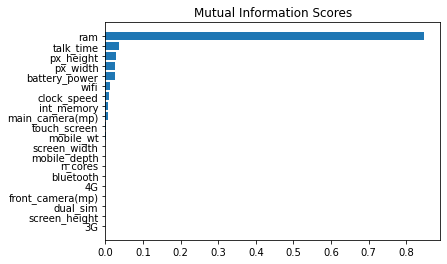

In [14]:
scores = mi_scores.sort_values(ascending=True)
width = np.arange(len(scores))
ticks = list(scores.index)
plt.barh(width, scores)
plt.yticks(width, ticks)
plt.title("Mutual Information Scores")
plt.show()

* Conclusion The price range mainly depend upon Ram as expected.


## Data Visualization

### Viewing the price_range of mobile

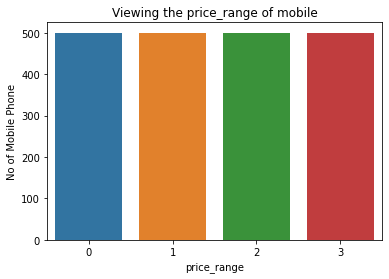

In [15]:
plt.title('Viewing the price_range of mobile')
sns.countplot(x='price_range' , data=train_set)
plt.ylabel('No of Mobile Phone')
plt.show()

###  Viewing how bluetooth affect its price

* Correlation with price range is (0.02)

* These are discete data so we use countplot to analysis data.

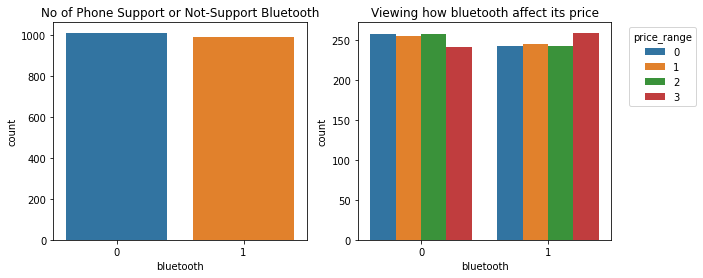

In [16]:
figure,ax =plt.subplots(1,2 , figsize=(10,4))
ax1=sns.countplot(ax=ax[0] , x='bluetooth' , data=train_set)
ax2=sns.countplot(ax=ax[1],x='bluetooth' , data=train_set , hue='price_range')
plt.legend( title='price_range', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.title.set_text('No of Phone Support or Not-Support Bluetooth')
ax2.title.set_text('Viewing how bluetooth affect its price')
plt.show()

### Checking How Clock Speed affect the price

* Correaltion with price range is (-0.006).

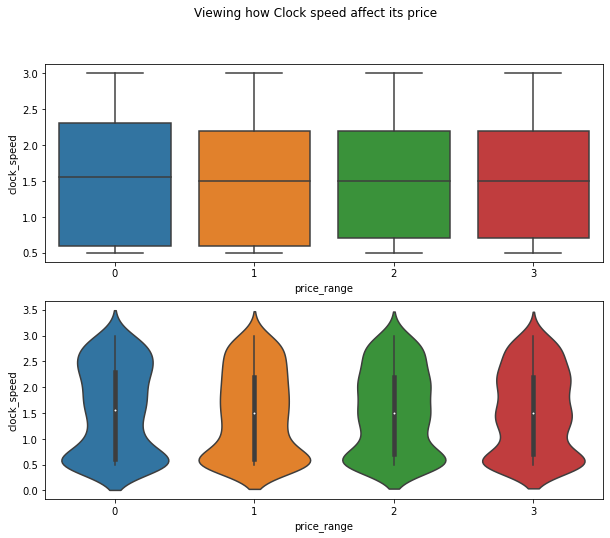

In [17]:
figure,ax =plt.subplots(2,1 , figsize=(10,8))
plt.suptitle('Viewing how Clock speed affect its price')
ax1=sns.boxplot(ax=ax[0] , y='clock_speed', x='price_range' , data=train_set)
ax2=sns.violinplot(ax=ax[1],x='price_range',y='clock_speed' ,data=train_set )
plt.show()

### Checking How the number of Sim cards affect the price

* Correaltion with price range is (0.17).

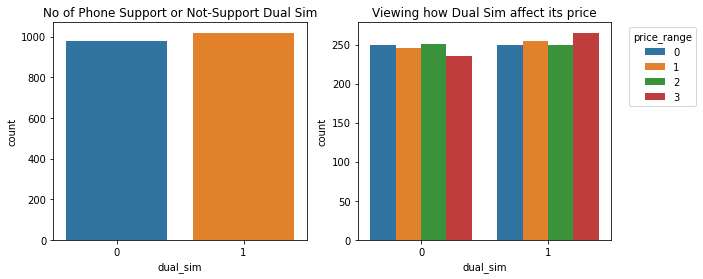

In [18]:
figure,ax =plt.subplots(1,2 , figsize=(10,4))
ax1=sns.countplot(ax=ax[0] , x='dual_sim' , data=train_set)
ax2=sns.countplot(ax=ax[1],x='dual_sim' , data=train_set , hue='price_range')
plt.legend( title='price_range', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.title.set_text('No of Phone Support or Not-Support Dual Sim')
ax2.title.set_text('Viewing how Dual Sim affect its price')
plt.show()

### Checking How Front Camera (mega pixel) affect price
* Correaltion with price range is (0.02).

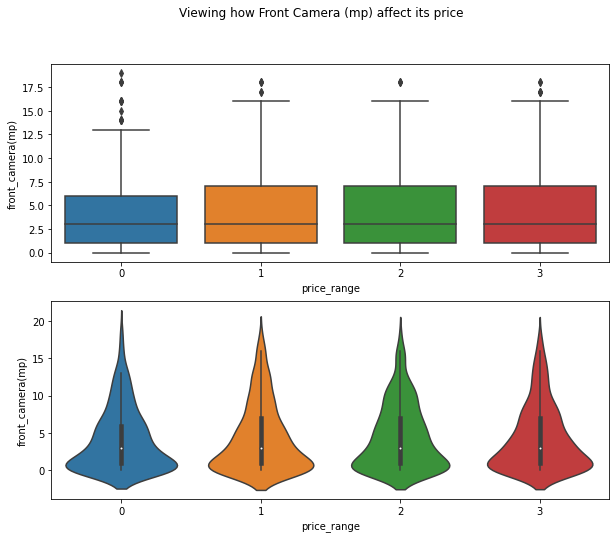

In [19]:
figure,ax =plt.subplots(2,1 , figsize=(10,8))
plt.suptitle('Viewing how Front Camera (mp) affect its price')
ax1=sns.boxplot(ax=ax[0] , x='price_range' , y='front_camera(mp)', data=train_set)
ax2=sns.violinplot(ax=ax[1],x='price_range',y='front_camera(mp)' ,data=train_set )
plt.show()

### Checking How 4G connectivity affect the price

* Correaltion with price range is (0.014).

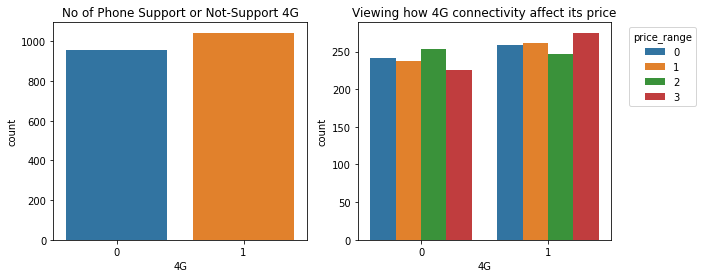

In [20]:
figure,ax =plt.subplots(1,2 , figsize=(10,4))
ax1=sns.countplot(ax=ax[0] , x='4G' , data=train_set)
ax2=sns.countplot(ax=ax[1],x='4G' , data=train_set , hue='price_range')
plt.legend( title='price_range', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.title.set_text('No of Phone Support or Not-Support 4G')
ax2.title.set_text('Viewing how 4G connectivity affect its price')
plt.show()

### Checking How Internal Memory affect the price
* Correaltion with price range is (0.04).

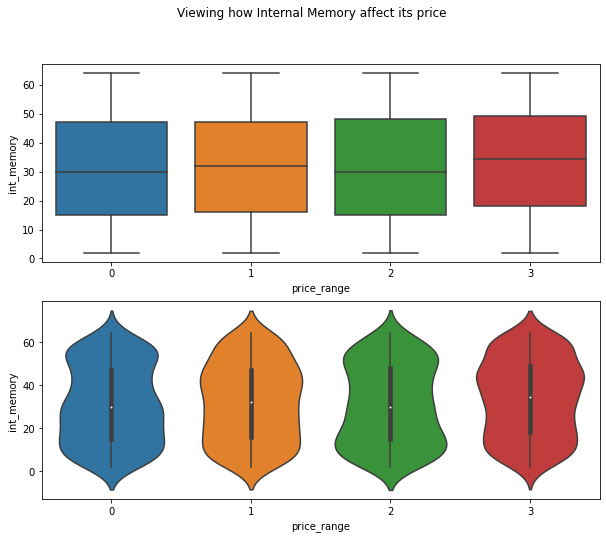

In [21]:
figure,ax =plt.subplots(2,1 , figsize=(10,8))
plt.suptitle('Viewing how Internal Memory affect its price')
ax1=sns.boxplot(ax=ax[0] , x='price_range' , y='int_memory', data=train_set)
ax2=sns.violinplot(ax=ax[1],x='price_range',y='int_memory' ,data=train_set )
plt.show()

### Checking how no of cores effect the price
* Correaltion with price range is (-0.004).

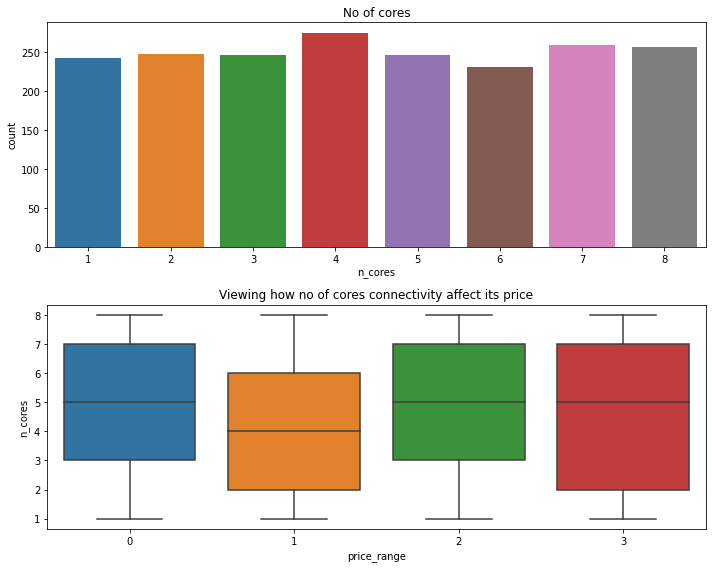

In [22]:
figure,ax =plt.subplots(2,1 , figsize=(10,8))
ax1=sns.countplot(ax=ax[0] , x='n_cores' , data=train_set)
ax2=sns.boxplot(ax=ax[1],y='n_cores' , data=train_set , x='price_range')
ax1.title.set_text('No of cores')
ax2.title.set_text('Viewing how no of cores connectivity affect its price')
figure.tight_layout()
plt.show()

### Viewing how Main Camera (mp) affect its price
* Correaltion with price range is (0.03).

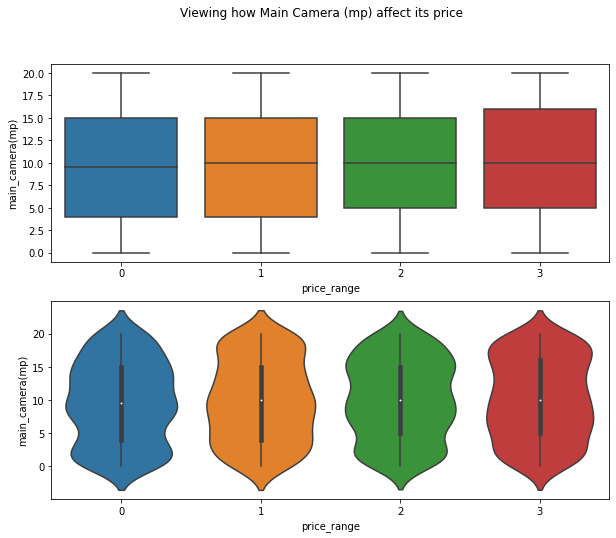

In [23]:
figure,ax =plt.subplots(2,1 , figsize=(10,8))
plt.suptitle('Viewing how Main Camera (mp) affect its price')
ax1=sns.boxplot(ax=ax[0] , x='price_range' , y='main_camera(mp)', data=train_set)
ax2=sns.violinplot(ax=ax[1],x='price_range',y='main_camera(mp)' ,data=train_set )
plt.show()

### Checking How Ram affect its price
* Correaltion with price range is (0.9).

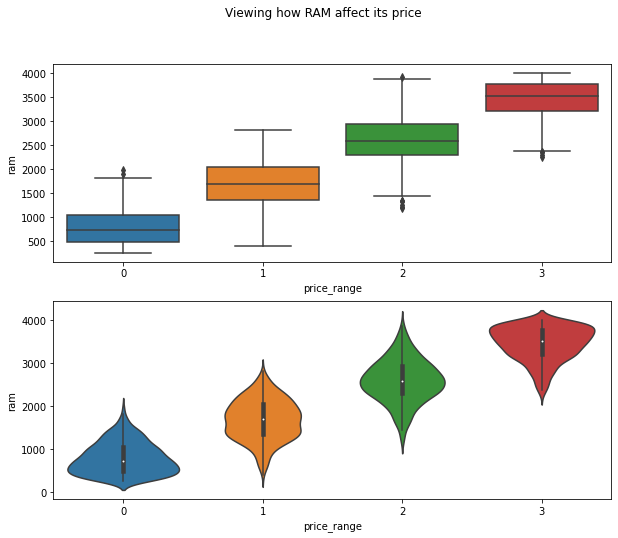

In [24]:
figure,ax =plt.subplots(2,1 , figsize=(10,8))
plt.suptitle('Viewing how RAM affect its price')
ax1=sns.boxplot(ax=ax[0] , x='price_range' , y='ram', data=train_set)
ax2=sns.violinplot(ax=ax[1],x='price_range',y='ram' ,data=train_set )
plt.show()

### Checking How Battery life affect price
* Correaltion with price range is (0.2).

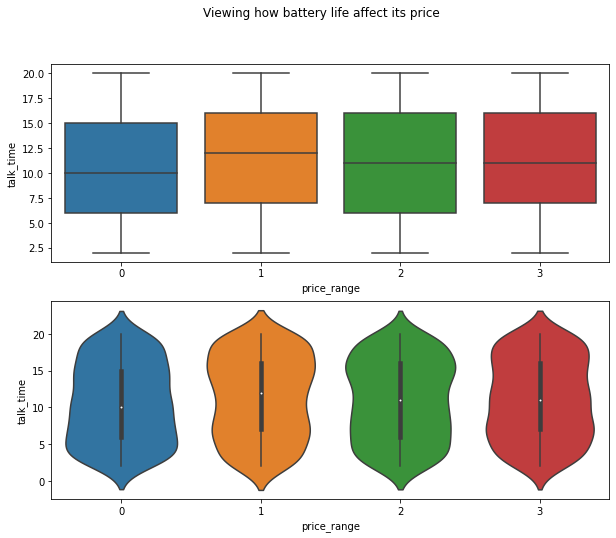

In [25]:
figure,ax =plt.subplots(2,1 , figsize=(10,8))
plt.suptitle('Viewing how battery life affect its price')
ax1=sns.boxplot(ax=ax[0] , x='price_range' , y='talk_time', data=train_set)
ax2=sns.violinplot(ax=ax[1],x='price_range',y='talk_time' ,data=train_set )
plt.show()

### Viewing how 3G connectivity affect its price
* Correaltion with price range is (0.02).

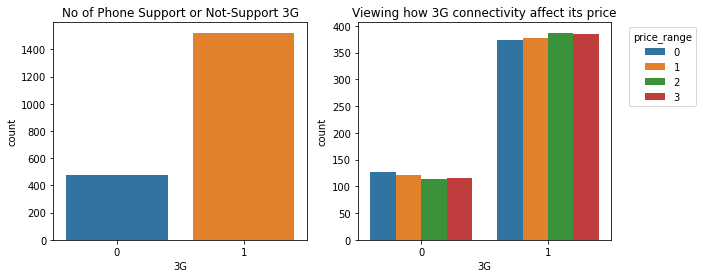

In [26]:
figure,ax =plt.subplots(1,2 , figsize=(10,4))
ax1=sns.countplot(ax=ax[0] , x='3G' , data=train_set)
ax2=sns.countplot(ax=ax[1],x='3G' , data=train_set , hue='price_range')
plt.legend( title='price_range', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.title.set_text('No of Phone Support or Not-Support 3G')
ax2.title.set_text('Viewing how 3G connectivity affect its price')
plt.show()

### Viewing touch screen affect the price
* Correaltion with price range is (-0.03).

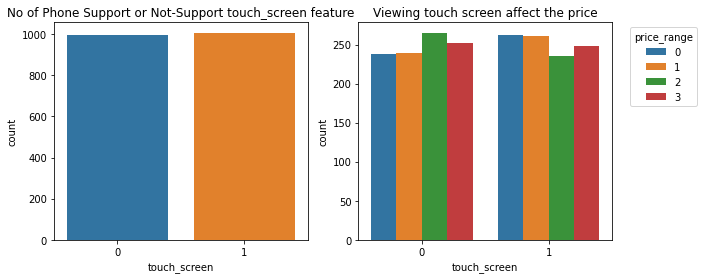

In [27]:
figure,ax =plt.subplots(1,2 , figsize=(10,4))
ax1=sns.countplot(ax=ax[0] , x='touch_screen' , data=train_set)
ax2=sns.countplot(ax=ax[1],x='touch_screen' , data=train_set , hue='price_range')
plt.legend( title='price_range', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.title.set_text('No of Phone Support or Not-Support touch_screen feature')
ax2.title.set_text('Viewing touch screen affect the price')
plt.show()

### Viewing Wifi affect the price
* Correaltion with price range is (0.01).

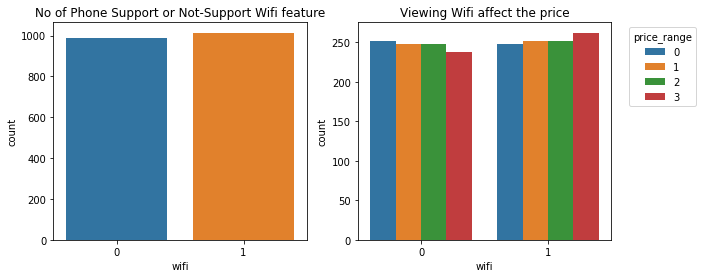

In [28]:
figure,ax =plt.subplots(1,2 , figsize=(10,4))
ax1=sns.countplot(ax=ax[0] , x='wifi' , data=train_set)
ax2=sns.countplot(ax=ax[1],x='wifi' , data=train_set , hue='price_range')
plt.legend( title='price_range', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.title.set_text('No of Phone Support or Not-Support Wifi feature')
ax2.title.set_text('Viewing Wifi affect the price')
plt.show()

## Fixing Outlier

* We will use minimum and maximum threshold to remove the outliers from all the numeric features in training data

* We will delete every data less than min threshold and more than max threshold

In [29]:
features = ['battery_power' , 'clock_speed' , 'mobile_wt' , 'int_memory' , 'mobile_depth' , 'px_height' , 'px_width' , 'screen_height' , 'screen_width' , 'talk_time']

In [30]:
train_set_outlier = train_set
train_set_outlier.shape

(2000, 21)

In [31]:
## min_percentile = 0.001
## max_percentile = 0.999

for feature in features:
    min_threshold , max_threshold = train_set_outlier[feature].quantile([0.001 , 0.999])
    train_outlier=train_set_outlier[(train_set_outlier > min_threshold) | (train_set_outlier < max_threshold)]

In [32]:
train_outlier.shape

(2000, 21)

* There are no Outlier in Data Frame

## Data PreProcessing

In [33]:
Y_train = train_set['price_range']

## concating train and test together
all_data = pd.concat([train_set , test_set]).reset_index(drop = True)

all_data.drop('price_range', axis=1 , inplace=True)

all_data.shape

(3000, 21)

In [34]:
all_data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera(mp),4G,int_memory,mobile_depth,mobile_wt,n_cores,...,px_height,px_width,ram,screen_height,screen_width,talk_time,3G,touch_screen,wifi,id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,NaN
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,NaN
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,NaN
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,NaN
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,NaN


* Dropping Unnecessary Column

In [35]:
## Removing id because it comes after concating both data set
all_data.drop('id' , axis=1 , inplace=True)

In [36]:
all_data.shape

(3000, 20)

## Cheking For Null Values

In [37]:
all_data.isnull().sum()

battery_power       0
bluetooth           0
clock_speed         0
dual_sim            0
front_camera(mp)    0
4G                  0
int_memory          0
mobile_depth        0
mobile_wt           0
n_cores             0
main_camera(mp)     0
px_height           0
px_width            0
ram                 0
screen_height       0
screen_width        0
talk_time           0
3G                  0
touch_screen        0
wifi                0
dtype: int64

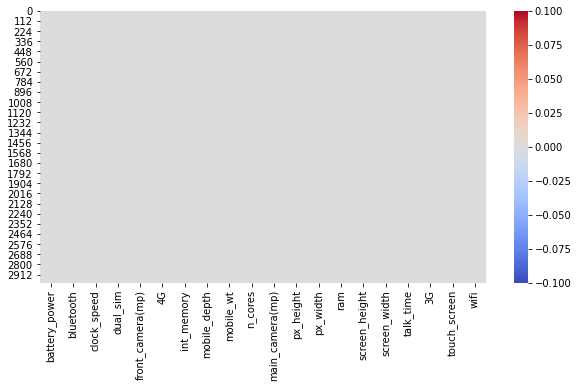

In [38]:
## Making Heatmap of null value
plt.figure(figsize=(10,5))
sns.heatmap(all_data.isnull() , cmap='coolwarm')
plt.show()

* Conclusion : There is not any null value.

## Feature Engineering

#### 1. Creating a new column named clock_speed_category
  * Slow (0) = less than 1 Ghz
  * Medium (1) = Between 1 Ghz to 1.8 Ghz
  * High (2) = Above 1.8 Ghz

#### 2. Creating a new column named mobile_wt_category
  * light_wt (0) = less than 140 g
  * ideal_wt (1) = 140 g to 170 g
  * bulk (2) = More than 170 g
 
#### 3. Creating a new Column named has_front_camera
   * Yes = 1
   * No = 0

#### 4. Creating a new Column named has_main_camera
   * Yes = 1
   * No = 0


In [39]:
## 1.
def clock_speed_classifier(x):
    if x < 1.0 :
        return 0
    elif (x >= 1.0) & (x <= 1.8) :
        return 1
    else:
        return 2

In [40]:
all_data['clock_speed_category'] = all_data['clock_speed'].apply(lambda x : clock_speed_classifier(x))

In [41]:
## 2.
def mobile_wt_classfier(x):
    if x > 140 :
        return 0
    elif (x >= 140) & (x <= 170):
        return 1
    else:
        return 2

In [42]:
all_data['mobile_wt_category'] = all_data['mobile_wt'].apply(lambda x : mobile_wt_classfier(x))

In [43]:
## 3.
def front_camera_classifier(x):
    if x == 0:
        return 0
    else :
        return 1

In [44]:
all_data['has_front_camera'] = all_data['front_camera(mp)'].apply(lambda x : front_camera_classifier(x))

In [45]:
## 4.
def main_camera_classifier(x):
    if x == 0:
        return 0
    else :
        return 1

In [46]:
all_data['has_main_camera'] = all_data['main_camera(mp)'].apply(lambda x : main_camera_classifier(x))

## Spliting Train and test

In [47]:
X_train = all_data[:len(train_set)]

Y_test = all_data[len(train_set):]

print(f'The shape of train set is -->{X_train.shape} , and the shape of test set is {Y_test.shape }')

The shape of train set is -->(2000, 24) , and the shape of test set is (1000, 24)


## Scaling Data

* Not Scaling the data Because after doing this all the predicted value become same.

In [48]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)

## Model Buliding


#### Before going further, I like to see how various different models perform with default parameters. I tried the following models using 10 fold cross validation to get a baseline.



  #### . Logistic Regression 

  #### . Decision Tree 

  #### . K Nearest Neighbor 

  #### . Random Forest 

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [50]:
## Logistic Regression
lr = LogisticRegression()
val = cross_val_score(lr , X_train , Y_train , cv= 10)
val.mean()

0.635

In [51]:
## DecisionTreeClassifier
lr = DecisionTreeClassifier()
val = cross_val_score(lr , X_train , Y_train , cv= 10)
val.mean()

0.8344999999999999

In [52]:
## KNeighborsClassifier
lr = KNeighborsClassifier()
val = cross_val_score(lr , X_train , Y_train , cv= 10)
val.mean()

0.9235000000000001

In [53]:
## RandomForestClassifier
lr = RandomForestClassifier()
val = cross_val_score(lr , X_train , Y_train , cv= 10)
val.mean()

0.869

  #### . Logistic Regression (63 %)

  #### . Decision Tree (83%)

  #### . K Nearest Neighbor (92 %) 

  #### . Random Forest (86 %)

## Training model on  K Nearest Neighbor because it gives better baseline than others.


In [54]:
model = KNeighborsClassifier()
model.fit(X_train , Y_train)
predicted = model.predict(Y_test)

In [55]:
# converting array values in dataframe
predicted= pd.DataFrame(predicted, columns = ['price_range'])
# adding passenger id
predicted.insert(0, "Id", id)

## Result

In [56]:
## seeing the predicted value
predicted['price_range'].value_counts()

3    260
0    256
2    255
1    229
Name: price_range, dtype: int64

In [57]:
## 
predicted.to_csv('prediction.csv',index=False)